# Explotary Data Analysis of King Country price dataset for big families
![](image/27dbc36305.jpg)

In [2]:
# importing the packages and libraries we need for our code.
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# importing the csv data of "King Country house prices as a pandas dataframe"
import pandas as pd
original_dataframe= pd.read_csv("data/King_County_House_prices_dataset.csv")

In [4]:
# we make a copy of the dataframe and continue to work on this copy. 
# We will manipulate, modify and filter this copy with out changing the original data.
df=original_dataframe.copy()

In [5]:
# lets take a look at the data.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


from wiki:

In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower [2] and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths).

In summary, just a big mess :)

Stakeholder: 
>5 kids
- must have at least 5 bedrooms and 2 bathrooms
>no money
- the price must be less than median price 
>wants nice (social) neighborhood
- the home must be close to the homes with price close or greater than the median price. 

- where and when can the stakeholder buy the desired home with reasonable price?  

- Hypothesis A): 
the greater is the difference between the number of bathrooms und bedrooms, the lower the price.

- Hypothesis B): 
the greater is the ratio of footage of the home per bedroom, the higher is the price.


In [6]:
# here we take look at the our data column. we observe that the date column 
# is of type object, meanings that it is a string or may be a mixture of data types.
# For a convenient access to date column we should change this data type to 
# datetime64 pandas dtype. We do this in the next cell. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# here we change the data type of the date column to datetime64 pandas dtype.
df['date'] = df['date'].astype('datetime64[ns]')

In [8]:
#here we add two column to our dataframe. One column contains only month 
# on which the house is sold the other contains information only about the year of selling. 
df["month_sold"]=df.date.dt.month
df["year_sold"]=df.date.dt.year

In [9]:
# here you can see the changes in dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [10]:
# we separate the data according the year on which the house is sold.
df_2014=df[df['year_sold']==2014]
df_2015=df[df['year_sold']==2015]

In [11]:
# We check if some columns have missings data.
# As we see there missing data in column waterfront and yr_renovated.
# But this column are not relevant to my analysis and therefor I do not got to a 
# cleaning process.
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month_sold          0
year_sold           0
dtype: int64

> The hypothese A is not valid. 
- In the following graph we can see that the price doesn't depend on the difference of the number bedrooms and bathrooms.

>Hypothesis B is valid. 
- In the following graph we see thet the price is positively depend on the rooms-bath ratio.

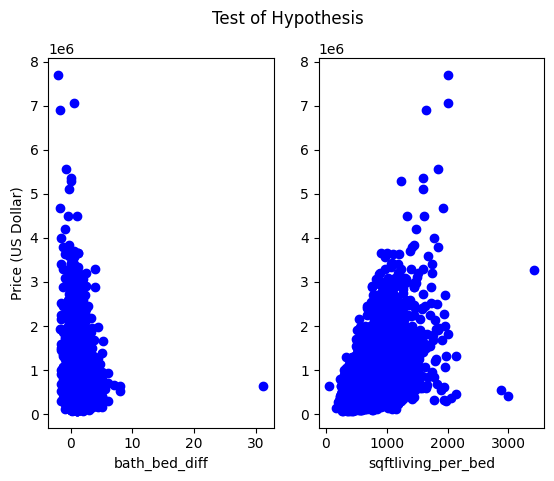

In [12]:
# we define a figure containing two subplts "ax1" and "ax2" in one row and two column "subplot(1,2)"
fig, (ax1, ax2) = plt.subplots(1,2)
# Inserting a title for both subplots
fig.suptitle('Test of Hypothesis')
# scatterplot of price vs difference of bathrooms and bedrooms.
ax1.plot(df["bedrooms"]-df["bathrooms"],df["price"],"bo")
# give a name to x and y axis of subplot ax1
ax1.set_ylabel('Price (US Dollar)')
ax1.set_xlabel("bath_bed_diff")


# scatterplot of price vs ratio of livingsroom area and number of bedrooms.
ax2.plot(df["sqft_living"]/df["bedrooms"],df["price"],"bo")
# give a name to x axis of subplot ax2
ax2.set_xlabel("sqftliving_per_bed")


plt.show()

Dataframe with column of interest

In [13]:
# choosing and adding certain column of our interest into a new data frame df_1.
# This datafrane includes price, number of bathrooms, number of bedrooms, difference of them, area of livingroom 
# and the area of livingroom per bedroom  
df_1=df[["price","bathrooms","bedrooms","sqft_living","sqft_living15"]];
df_1["bath_bed_diff"]=df["bathrooms"]-df["bedrooms"]
df_1["sqftliving_per_bed"]=df["sqft_living"]/df["bedrooms"]
df_1["bed_bath_ratio"]=df["bedrooms"]/df["bathrooms"]


> Correlation table of df_1

In [14]:
#corrolation table of the variables in df_1.
df_1.corr(method='pearson')

,price,bathrooms,bedrooms,sqft_living,sqft_living15,bath_bed_diff,sqftliving_per_bed,bed_bath_ratio
price,1.000000,0.525906,0.308787,0.701917,0.585241,0.139868,0.580109,-0.249948
bathrooms,0.525906,1.000000,0.514508,0.755758,0.569884,0.345460,0.517415,-0.653476
bedrooms,0.308787,0.514508,1.000000,0.578212,0.393406,-0.626952,-0.024076,0.209444
sqft_living,0.701917,0.755758,0.578212,1.000000,0.756402,0.053838,0.755398,-0.324152
sqft_living15,0.585241,0.569884,0.393406,0.756402,1.000000,0.087217,0.604745,-0.300021
bath_bed_diff,0.139868,0.345460,-0.626952,0.053838,0.087217,1.000000,0.496440,-0.822923
sqftliving_per_bed,0.580109,0.517415,-0.024076,0.755398,0.604745,0.496440,1.000000,-0.539071
bed_bath_ratio,-0.249948,-0.653476,0.209444,-0.324152,-0.300021,-0.822923,-0.539071,1.000000


In [15]:
# in this figure we present the location of objects in the map. 
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="long",
                        zoom=7,
                        height=700)
fig.update_layout(mapbox_style="open-street-map")

<AxesSubplot: xlabel='price', ylabel='Density'>

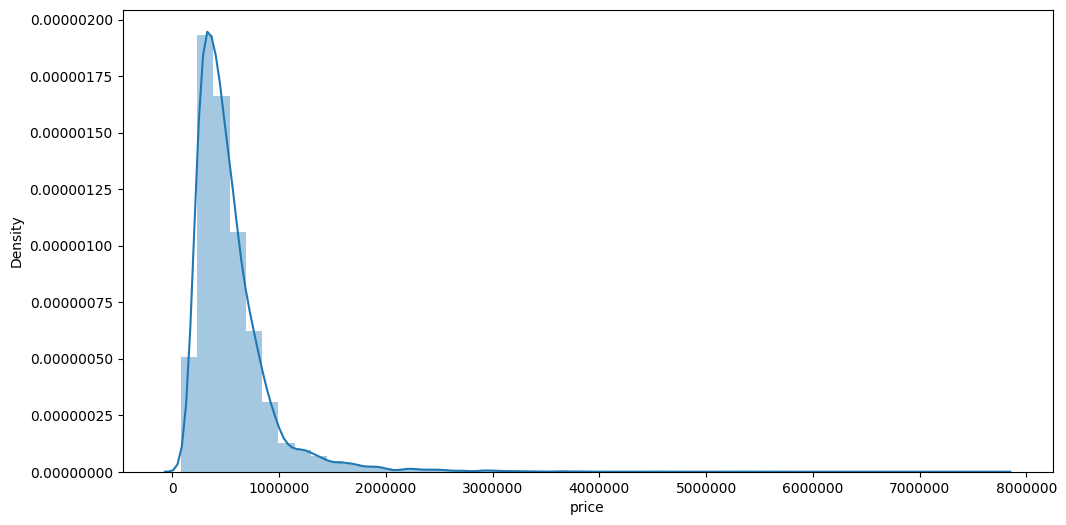

In [16]:
#visualisation of the probability distribution function of the price as a randim variable
plt.figure(figsize=(12,6))
plt.subplot().ticklabel_format(useOffset=False,style='plain')
sns.distplot(df['price'])

In [17]:
# Median of the price. It is more representetive for this kind of skewed distribution.
df["price"].median()

450000.0

<AxesSubplot: xlabel='sqft_living15', ylabel='Density'>

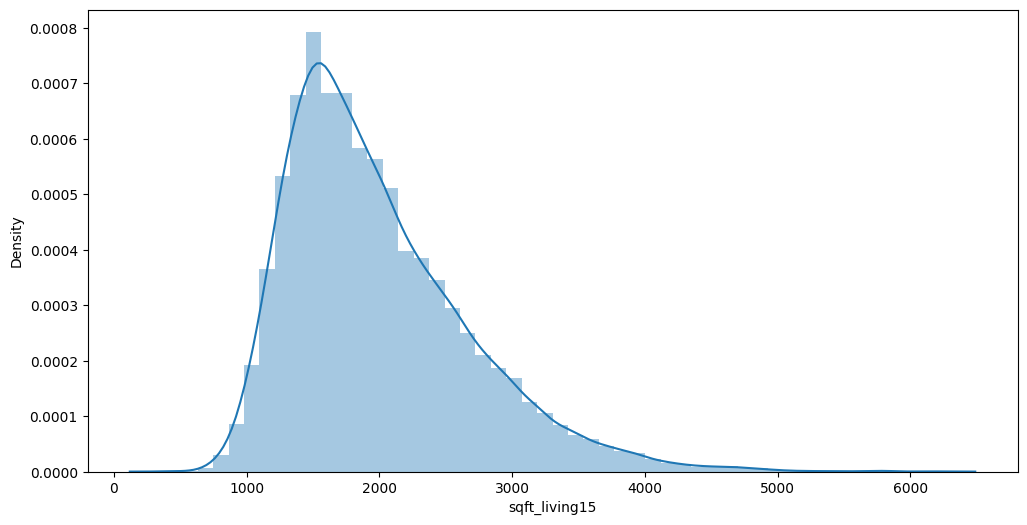

In [18]:
#visualisation of the probability distribution function of the price as a randim variable
plt.figure(figsize=(12,6))
plt.subplot().ticklabel_format(useOffset=False,style='plain')
sns.distplot(df['sqft_living15'])

In [19]:
df["sqft_living15"].quantile(q=0.75)

2360.0

Now we filter the data according to needs of the stakeholder.

In [20]:
# filtering data: price less than 500000 $, number of bedrooms >4 and 
# nearst neighbors have big living rooms.
df_filter=df[(df.price< 500000) & (df.sqft_living15 >=2360) & (df.bedrooms>4)]

In [21]:
# zipcodes of the houses fulfilling the stakeholder's wishes 
df_filter.zipcode.unique()

array([98052, 98003, 98059, 98023, 98092, 98027, 98077, 98042, 98019,
       98055, 98198, 98166, 98038, 98058, 98030, 98168, 98001, 98188,
       98056, 98031, 98074, 98005, 98011, 98072, 98065, 98053, 98155,
       98034, 98125, 98177, 98118, 98178, 98002, 98032, 98119])

In [22]:
# the location of the houses of filtered data as stakeholer wishes. 
fig = px.scatter_mapbox(df_filter,
                        lat="lat",
                        lon="long",
                        zoom=7,
                        height=700)
fig.update_layout(mapbox_style="open-street-map")

In [119]:
# calculation the median of prices for each month. 
df2=df[["month_sold","price"]].groupby("month_sold").median()

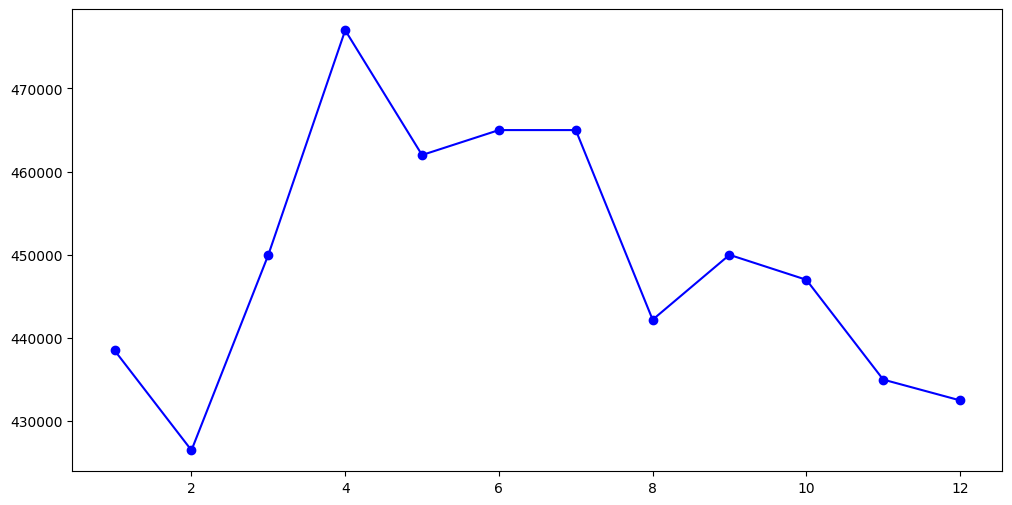

In [53]:
# the graph of the median price for in each month. 
# here you cann see at which month the houses are cheaper.
plt.figure(figsize=(12,6))
plt.subplot().ticklabel_format(useOffset=False,style='plain')
plt.plot(df2,"bo-")